<a href="https://colab.research.google.com/github/BorsattoAndrea/API-project/blob/main/Andrea/PlainCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Layer


tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.9.2


In [ ]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
 # Suppress warnings
import warnings
import logging

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)
tf.get_logger().setLevel('ERROR')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
#drive.flush_and_unmount()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!unzip drive/MyDrive/ANNDL1/training_dataset_homework1

Archive:  drive/MyDrive/Homework1/training_dataset_homework1.zip
   creating: training_data_final/Species1/
  inflating: training_data_final/Species1/00000.jpg  
  inflating: training_data_final/Species1/00001.jpg  
  inflating: training_data_final/Species1/00002.jpg  
  inflating: training_data_final/Species1/00003.jpg  
  inflating: training_data_final/Species1/00004.jpg  
  inflating: training_data_final/Species1/00005.jpg  
  inflating: training_data_final/Species1/00006.jpg  
  inflating: training_data_final/Species1/00007.jpg  
  inflating: training_data_final/Species1/00008.jpg  
  inflating: training_data_final/Species1/00009.jpg  
  inflating: training_data_final/Species1/00010.jpg  
  inflating: training_data_final/Species1/00011.jpg  
  inflating: training_data_final/Species1/00012.jpg  
  inflating: training_data_final/Species1/00013.jpg  
  inflating: training_data_final/Species1/00014.jpg  
  inflating: training_data_final/Species1/00015.jpg  
  inflating: training_data_f

In [ ]:
labels = ['Species1', #0
          'Species2', #1
          'Species3', #2
          'Species4', #3
          'Species5', #4
          'Species6', #5
          'Species7', #6
          'Species8' #7
      ]  

Species1:186
Species2:532
Species3:515
Species4:511
Species5:531
Species6:222
Species7:537
Species8:508


<BarContainer object of 8 artists>

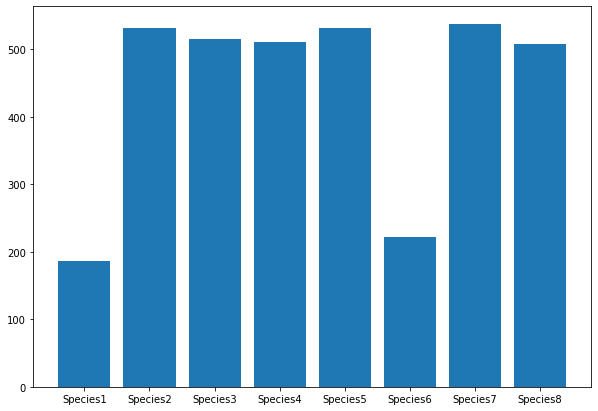

In [ ]:
arr = []
nmax = 0
for i in range(8):
  dir_path= "training_data_final/Species{}".format(i+1)
  cont = 0
  for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        cont += 1
  print("Species{}:{}".format(i+1,cont))
  arr.append(cont)
  if nmax < cont: 
    nmax = cont

fig = plt.figure(figsize=(10,7))      
plt.bar(labels, arr)


In [ ]:
import shutil
import math   

#class equalizator, we are going to duplicate random files for each species until we reach 
#the maximum number of image of the most populated class -> Species7 with 537 images
for i in range(8):
  dir_path= "training_data_final/Species{}".format(i+1)
  cont = 0
  if arr[i]<nmax:
    random_files = []
    dim = arr[i]
    #ex class 1 has 186 images, (537-186)/186 = 1.8, we must add duplicate 
    #the 186 images + the remaining 165-> 2 cycles (obtained with ceil(.))
    for j in range(math.ceil((nmax-dim)/arr[i])):
      #we random sample the number of files we need
      tmp = random.sample(os.listdir(dir_path),min(nmax-dim,arr[i]))
      dim += len(tmp)
      #we add one by one (probably there is an easier way) 
      for f in tmp:
        random_files.append('{}_'.format(j+1)+f)
    #we copy the files in the folder with a prefix
    for file in random_files:
      shutil.copy2(dir_path+'/'+file[2:], dir_path+'/'+"Duplicated{}".format(file))
  for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        cont += 1
  print("Species{}:{}".format(i+1,cont))
  arr.append(cont)
  if nmax < cont: 
    nmax = cont

Species1:537
Species2:537
Species3:537
Species4:537
Species5:537
Species6:537
Species7:537
Species8:537


Species1:537
Species2:537
Species3:537
Species4:537
Species5:537
Species6:537
Species7:537
Species8:537


<BarContainer object of 8 artists>

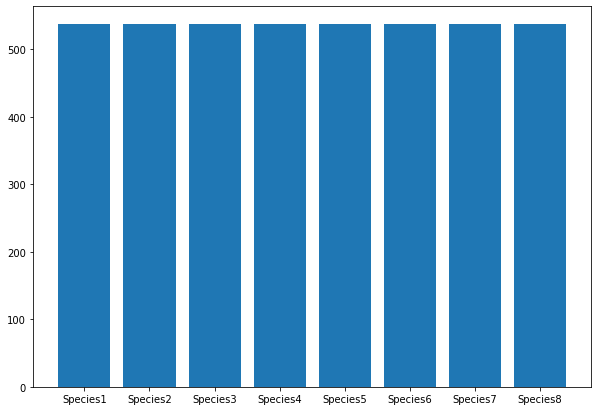

In [ ]:
arr = []
nmax = 0
for i in range(8):
  dir_path= "training_data_final/Species{}".format(i+1)
  cont = 0
  for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        cont += 1
  print("Species{}:{}".format(i+1,cont))
  arr.append(cont)
  if nmax < cont: 
    nmax = cont

fig = plt.figure(figsize=(10,7))      
plt.bar(labels, arr)

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('training_data_final', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 4296 files [00:00, 4670.25 files/s]


In [ ]:
# Dataset folders 
dataset_dir = 'output'
training_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

folder test:
Species1:55
Species2:55
Species3:55
Species4:55
Species5:55
Species6:55
Species7:55
Species8:55
folder train:
Species1:429
Species2:429
Species3:429
Species4:429
Species5:429
Species6:429
Species7:429
Species8:429
folder val:
Species1:53
Species2:53
Species3:53
Species4:53
Species5:53
Species6:53
Species7:53
Species8:53


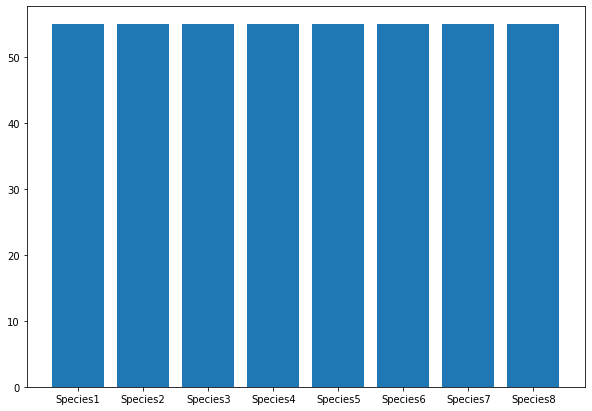

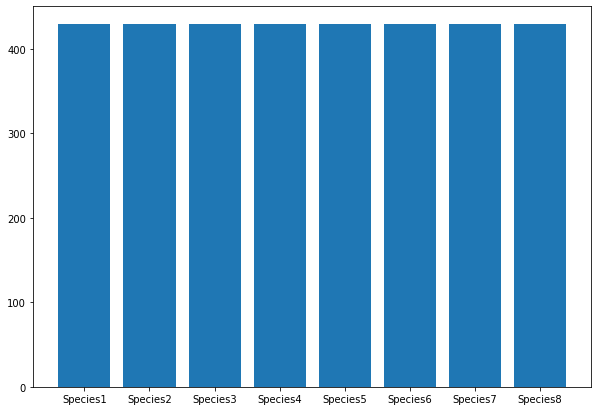

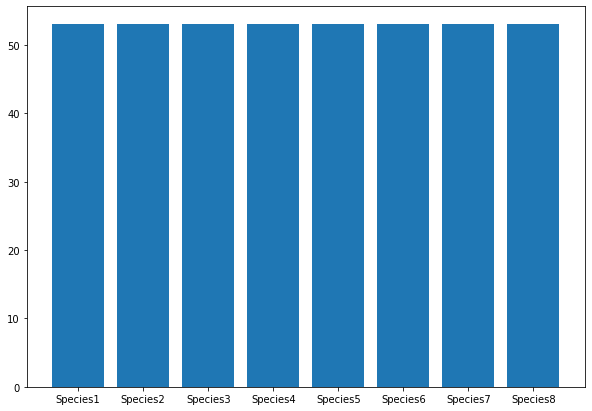

In [ ]:
for fold in ['test','train','val']:
  arr = []
  print("folder {}:".format(fold))
  for i in range(8):
    dir_path= "output/{}/Species{}".format(fold,i+1)
    cont = 0
    for path in os.listdir(dir_path):
      # check if current path is a file
      if os.path.isfile(os.path.join(dir_path, path)):
          cont += 1
    print("Species{}:{}".format(i+1,cont))
    arr.append(cont)

  fig = plt.figure(figsize=(10,7))      
  plt.bar(labels, arr)


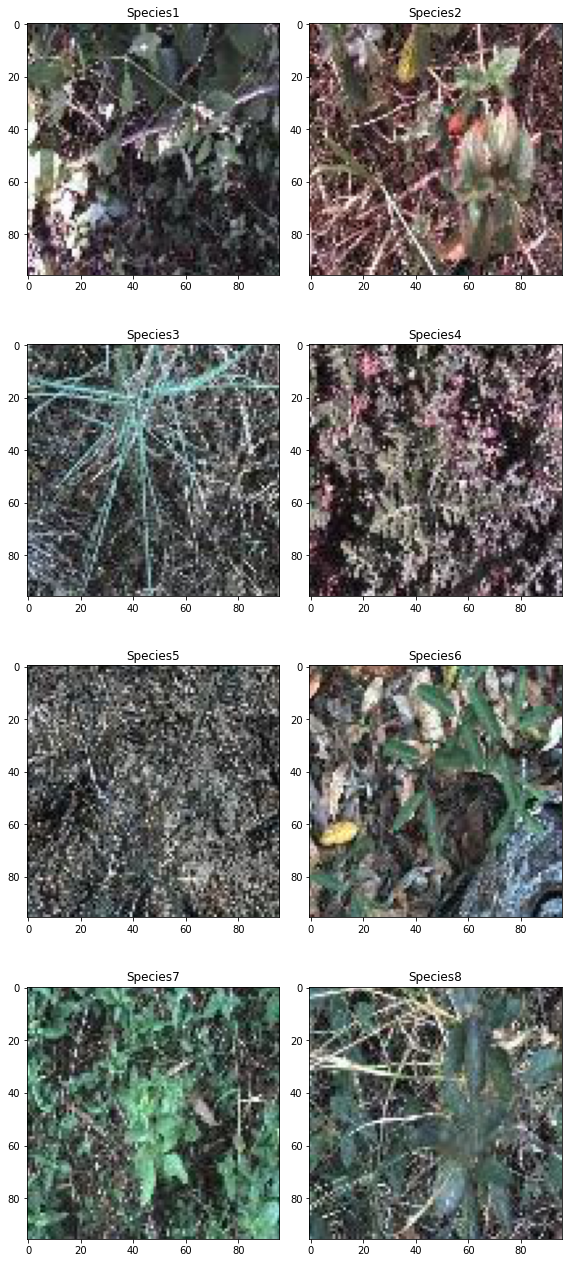

In [ ]:
# Plot example images from dataset
labels = ['Species1', #0
          'Species2', #1
          'Species3', #2
          'Species4', #3
          'Species5', #4
          'Species6', #5
          'Species7', #6
          'Species8' #7
      ]        

num_row = 4
num_col = 2
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_row,9*num_col))
for i in range(num_row*num_col):
  if i < 8:
    class_imgs = next(os.walk('{}/train/{}/'.format(dataset_dir, labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('{}/train/{}/{}'.format(dataset_dir, labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:

# Import glob to parse filenames
import glob

# Import numpy
import numpy as np

# Plot
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]

# Opencv
import cv2
def rand_bbox(size, lamb):
    """ Generate random bounding box 
    Args:
        - size: [width, breadth] of the bounding box
        - lamb: (lambda) cut ratio parameter, sampled from Beta distribution
    Returns:
        - Bounding box
    """
    W = size[0]
    H = size[1]
    cut_rat = np.sqrt(1. - lamb)
    cut_w = np.int(W * cut_rat)
    cut_h = np.int(H * cut_rat)

    # uniform
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2
def generate_cutmix_image(batch, beta):
    """ Generate a CutMix augmented image from a batch 
    Args:
        - image_batch: a batch of input images
        - image_batch_labels: labels corresponding to the image batch
        - beta: a parameter of Beta distribution.
    Returns:
        - CutMix image batch, updated labels
    """
    image_batch = batch[0]
    image_batch_labels = batch[1]
    # generate mixed sample
    lam = np.random.beta(beta, beta)
    rand_index = np.random.permutation(len(image_batch))
    target_a = image_batch_labels
    target_b = image_batch_labels[rand_index]
    bbx1, bby1, bbx2, bby2 = rand_bbox(image_batch[0].shape, lam)
    image_batch_updated = image_batch.copy()
    image_batch_updated[:, bbx1:bbx2, bby1:bby2, :] = image_batch[rand_index, bbx1:bbx2, bby1:bby2, :]
    
    # adjust lambda to exactly match pixel ratio
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (image_batch.shape[1] * image_batch.shape[2]))
    label = target_a * lam + target_b * (1. - lam)
    
    batch_tranformed =[]
    batch_tranformed.append(image_batch_updated)
    batch_tranformed.append(label)

    return batch_tranformed


In [ ]:

class MixupGenerator():
    def __init__(self, generator, alpha=0.2):
        self.generator = generator #
        self.batch_size = generator.batch_size
        self.alpha = alpha
        self.shuffle = generator.shuffle


    def __call__(self):
        while True:
            itr_num = len(self.generator)

            for i in range(itr_num):
                X, y = self.__data_generation()

                yield X, y

    def __data_generation(self):
        batch = generate_cutmix_image(next(self.generator),self.alpha)
        return batch[0], batch[1]


In [ ]:
# Images are divided into folders, one for each class. 
# If the images are organized in such a way, we can exploit the 
# ImageDataGenerator to read them from disk.

# Create an instance of ImageDataGenerator for training, validation, and test sets
test_data_gen = ImageDataGenerator(
          rescale=1/255.
          #preprocessing_function = pr#preprocessing_function
          #preprocessing_function = tf.keras.applications.resnet_v2.preprocess_input,
          #preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
          #preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
          )

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method

test_gen = test_data_gen.flow_from_directory(directory=validation_dir,
                                               target_size=(96,96),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=32,
                                               shuffle=True,
                                               seed=seed)
mixgenerator = MixupGenerator(test_gen, alpha=2.0)()

Found 424 images belonging to 8 classes.


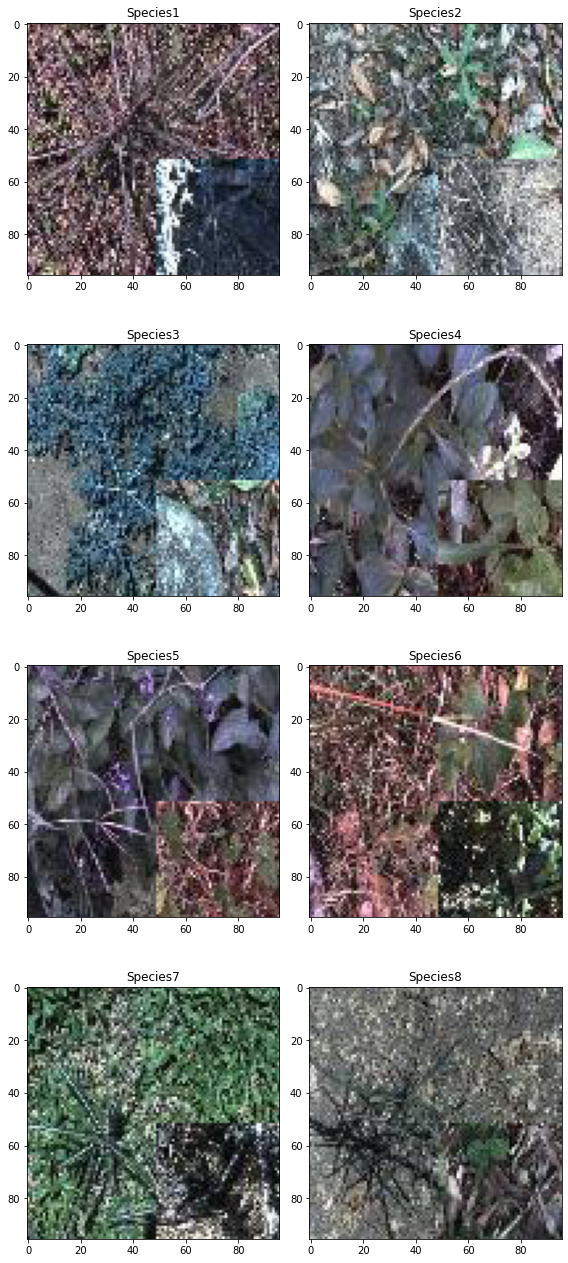

In [ ]:
batch_prova = next(mixgenerator)
num_row = 4
num_col = 2
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_row,9*num_col))
for i in range(num_row*num_col):
  if i < 8:
    img = batch_prova[0][i]
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()


Original Images


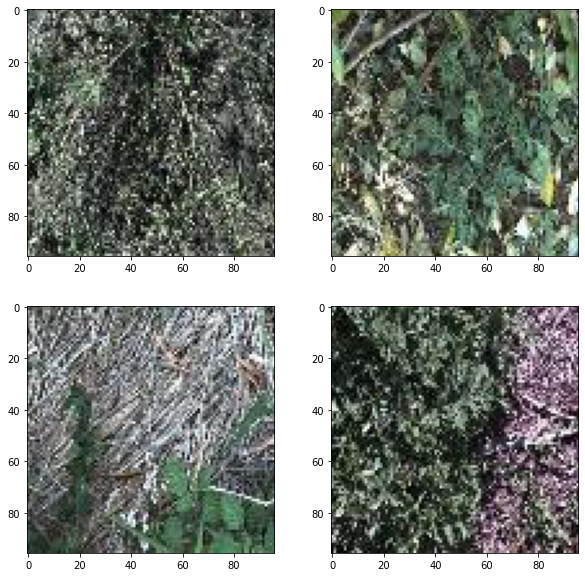

CutMix Images


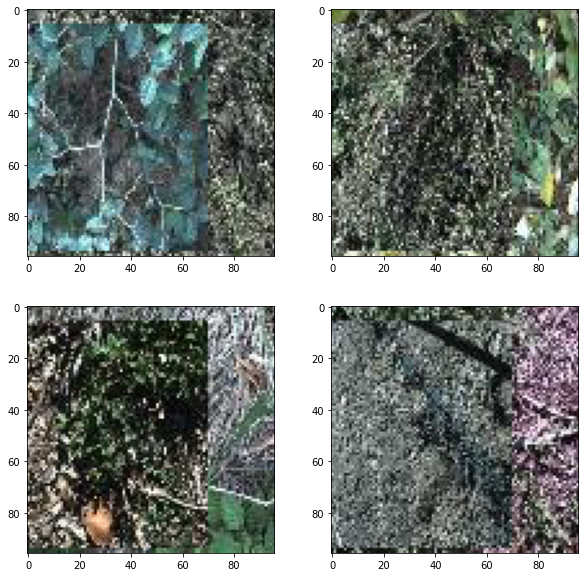

Original labels:
[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
Updated labels
[[0.6684028 0.        0.        0.3315972 0.        0.        0.
  0.       ]
 [0.        0.        0. 

In [ ]:
# Generate CutMix image
# Let's use the first image of the batch as the input image to be augmented
image_batch = next(test_gen)
image_batch_labels = image_batch[1]
image_batch_updated, image_batch_labels_updated = generate_cutmix_image(image_batch, 2.0)

# Show original images
print("Original Images")
for i in range(2):
    for j in range(2):
        plt.subplot(2,2,2*i+j+1)
        plt.imshow(image_batch[0][2*i+j])
plt.show()


# Show CutMix images
print("CutMix Images")
for i in range(2):
    for j in range(2):
        plt.subplot(2,2,2*i+j+1)
        plt.imshow(image_batch_updated[2*i+j])
plt.show()

# Print labels
print('Original labels:')
print(image_batch_labels)
print('Updated labels')
print(image_batch_labels_updated)

In [ ]:
batch_size = 32

In [ ]:
# Create an instance of ImageDataGenerator with Data Augmentation
aug_train_data_gen = ImageDataGenerator(
                                        rotation_range=360,
                                        height_shift_range=20,
                                        width_shift_range=20,
                                        zoom_range=0.3,
                                        #shear_range=15,
                                        horizontal_flip=True,
                                        vertical_flip=True, 
                                        fill_mode = 'reflect',
                                        brightness_range = [0.7,1.4],
                                        #fill_mode='constant',
                                        # cval = 0,
                                        #channel_shift_range = 35,
                                        #preprocessing_function = preprocessing_function
                                        #preprocessing_function = tf.keras.applications.resnet_v2.preprocess_input,
                                        #preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
                                        #preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
                                        rescale=1/255. # rescale value is multiplied to the image
                                        )

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
aug_train_gen = aug_train_data_gen.flow_from_directory(directory=training_dir,
                                                       target_size=(96,96),
                                                       color_mode='rgb',
                                                       classes=None, # can be set to labels
                                                       class_mode='categorical',
                                                       batch_size=batch_size,
                                                       shuffle=True,
                                                       seed=seed
                                                       )

Found 3432 images belonging to 8 classes.


In [ ]:
aug_train_gen_mixup = MixupGenerator(aug_train_gen, alpha=1.0)()

In [ ]:
# Images are divided into folders, one for each class. 
# If the images are organized in such a way, we can exploit the 
# ImageDataGenerator to read them from disk.

# Create an instance of ImageDataGenerator for training, validation, and test sets
valid_data_gen = ImageDataGenerator(
          rescale=1/255.
          #preprocessing_function = preprocessing_function
          #preprocessing_function = tf.keras.applications.resnet_v2.preprocess_input,
          #preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
          #preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
          )
test_data_gen = ImageDataGenerator(
          rescale=1/255.
          #preprocessing_function = preprocessing_function
          #preprocessing_function = tf.keras.applications.resnet_v2.preprocess_input,
          #preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
          #preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
          )

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method

valid_gen = valid_data_gen.flow_from_directory(directory=validation_dir,
                                               target_size=(96,96),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=batch_size,
                                               shuffle=False,
                                               seed=seed)
test_gen = test_data_gen.flow_from_directory(directory=test_dir,
                                              target_size=(96,96),
                                              color_mode='rgb',
                                              classes=None, # can be set to labels
                                              class_mode='categorical',
                                              batch_size=batch_size,
                                              shuffle=False,
                                              seed=seed)

Found 424 images belonging to 8 classes.
Found 440 images belonging to 8 classes.


<BarContainer object of 8 artists>

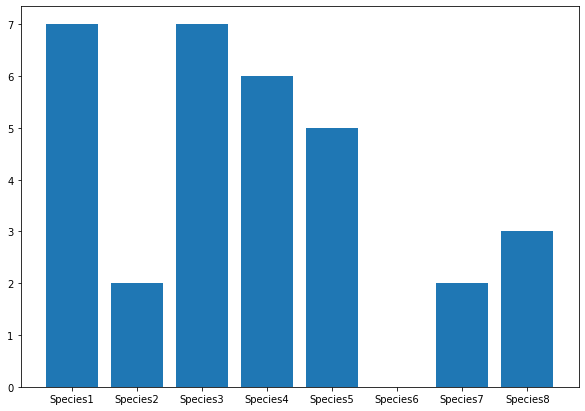

In [ ]:
#check batch distribution
batch = next(aug_train_gen)
arr = np.sum(batch[1],axis = 0)
fig = plt.figure(figsize=(10,7))      
plt.bar(labels, arr)

In [ ]:
def get_next_batch(generator):
  batch = next(generator)

  image = batch[0]
  target = batch[1]

  print("(Input) image shape:", image.shape)
  print("Target shape:",target.shape)

  # Visualize only the first sample
  # image = image[0]
  # target = target[0]
  # target_idx = np.argmax(target)
  # print()
  # print("Categorical label:", target)
  # print("Label:", target_idx)
  # print("Class name:", labels[target_idx])
  # fig = plt.figure(figsize=(6, 4))
  # plt.imshow(np.uint8(image))

  return batch

In [ ]:
# Get a sample from dataset and show info
batch = get_next_batch(aug_train_gen)

(Input) image shape: (32, 96, 96, 3)
Target shape: (32, 8)


In [ ]:
input_shape = (96, 96, 3)
epochs = 200

In [ ]:
def build_model(input_shape):
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    conv1 = tfkl.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(input_layer)
    pool1 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv1)

    conv2 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool1)
    pool2 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv2)

    conv3 = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool2)
    pool3 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv3)
    conv4 = tfkl.Conv2D(
        filters=256,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool3)
    pool4 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv4)
    conv5 = tfkl.Conv2D(
        filters=512,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool4)
    pool5 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv5)

    flattening_layer = tf.keras.layers.GlobalAveragePooling2D(name = 'GAP')(pool5)
    classifier_layer = tfkl.Dense(
        units=128, 
        name='Classifier', 
        activation='relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(flattening_layer)
    classifier_layer = tfkl.Dropout(0.5, seed=seed)(classifier_layer)
    output_layer = tfkl.Dense(
        units=8, 
        activation='softmax', 
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Output'
    )(classifier_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
model = build_model(input_shape)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 128)       73856 

In [ ]:
# from tensorflow.keras.layers.experimental import RandomFourierFeatures

# # Use the supernet as feature extractor
# supernet.trainable = False

# inputs = tfk.Input(shape=input_shape)

# #training = False for the batch normalizations
# x = supernet(inputs, training = False)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# #x = tfkl.Flatten(name='Flattening')(x)

# x = RandomFourierFeatures(output_dim = 2048,scale = None, kernel_initializer="gaussian")(x)
# # x = tfkl.Dense(
# #     256, 
# #     activation='relu',
# #     kernel_initializer = tfk.initializers.HeUniform(seed))(x)
# # x = tfkl.Dropout(0.2, seed=seed)(x)

# x = tfkl.Dense(
#     8, 
#     activation='softmax',
#     kernel_initializer = tfk.initializers.GlorotUniform(seed))(x)


# # Connect input and output through the Model class
# ft_model = tfk.Model(inputs,x, name='model')

# # Compile the model
# ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(1e-2), metrics='accuracy')
# ft_model.summary()

Alternatively, load an existing model pretrained with TL

In [ ]:
#load model already trained with TransferLearning
#ft_model = tf.keras.models.load_model("drive/MyDrive/Homework1Models2/CNN_TL_EfficientB0(no equal)")


In [ ]:
# Utility function to create folders and callbacks for training
from datetime import datetime

def create_folders_and_callbacks(model_name):

  exps_dir = os.path.join('data_augmentation_experiments')
  if not os.path.exists(exps_dir):
      os.makedirs(exps_dir)

  now = datetime.now().strftime('%b%d_%H-%M-%S')

  exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
  if not os.path.exists(exp_dir):
      os.makedirs(exp_dir)
      
  callbacks = []

  # # Model checkpoint
  # # ----------------
  # ckpt_dir = os.path.join(exp_dir, 'ckpts')
  # if not os.path.exists(ckpt_dir):
  #     os.makedirs(ckpt_dir)

  # ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), 
  #                                                    save_weights_only=True, # True to save only weights
  #                                                    save_best_only=False) # True to save only the best epoch 
  # callbacks.append(ckpt_callback)

  # Visualize Learning on Tensorboard
  # ---------------------------------
  tb_dir = os.path.join(exp_dir, 'tb_logs')
  if not os.path.exists(tb_dir):
      os.makedirs(tb_dir)
      
  # By default shows losses and metrics for both training and validation
  tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir, 
                                               profile_batch=0,
                                               histogram_freq=1)  # if > 0 (epochs) shows weights histograms
  callbacks.append(tb_callback)

  # Early Stopping
  # --------------
  es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)
  callbacks.append(es_callback)

  return callbacks

In [ ]:
# Create folders and callbacks and fit
aug_callbacks = create_folders_and_callbacks(model_name='CNN')

#Train the model
# history = model.fit(
#     x = aug_train_gen,
#     epochs = epochs,
#     validation_data = valid_gen,
#     callbacks = aug_callbacks,
#).history

history = model.fit_generator(generator=aug_train_gen_mixup,
                    steps_per_epoch=len(aug_train_gen),
                    validation_data=valid_gen,
                    epochs=epochs, verbose=1,
                    callbacks=aug_callbacks).history

Epoch 1/200
108/108 [==============================] - 16s 128ms/step - loss: 37.2147 - accuracy: 0.1171 - val_loss: 2.0790 - val_accuracy: 0.1250
Epoch 2/200
108/108 [==============================] - 12s 111ms/step - loss: 2.1562 - accuracy: 0.1238 - val_loss: 2.0794 - val_accuracy: 0.1250


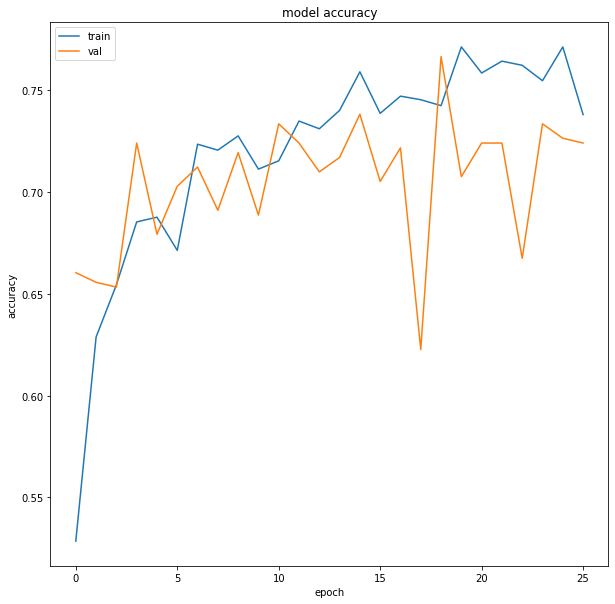

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

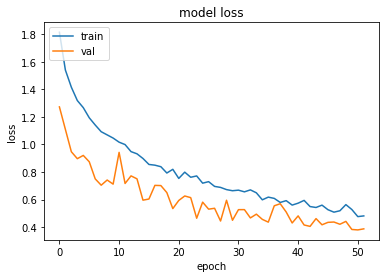

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Save best epoch model
ft_model.save("drive/MyDrive/Homework1Models2/ConvnextBaseTransfLearning")
#ft_model.save_weights('weights.h5')

In [ ]:
#load model
modelNew = tf.keras.models.load_model("CNN_Best3")

#load weights from checkpoint
modelNew = build_model(input_shape)
modelNew.load_weights("data_augmentation_experiments/CNN_NoAug_Nov11_13-13-22/ckpts/cp.ckpt")

In [ ]:
predictions = model.predict(test_gen)

46/46 [==============================] - 1s 15ms/step


In [ ]:
type(test_gen)

keras.preprocessing.image.DirectoryIterator

14/14 [==============================] - 9s 323ms/step
Accuracy: 0.7341
Precision: 0.7477
Recall: 0.7341
F1: 0.7348


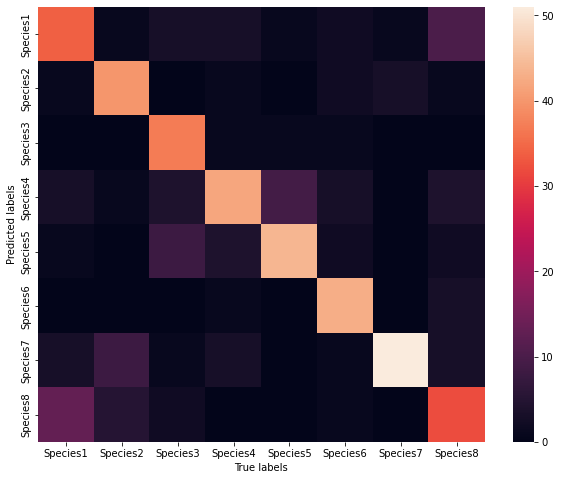

In [ ]:
y_test = test_gen.labels
predictions = ft_model.predict(test_gen)
# Compute the confusion matrix
cm = confusion_matrix(y_test, np.argmax(predictions, axis=-1))

# Compute the classification metrics
accuracy = accuracy_score(y_test, np.argmax(predictions, axis=-1))
precision = precision_score(y_test, np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(y_test, np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(y_test, np.argmax(predictions, axis=-1), average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, xticklabels=list(labels), yticklabels=list(labels))
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

In [ ]:
#zip the folder for then downloading it
#saving and downloading from drive takes less time
!zip -r /content/model.zip /content/CNN_Best3

  adding: content/CNN_Best3/ (stored 0%)
  adding: content/CNN_Best3/saved_model.pb (deflated 89%)
  adding: content/CNN_Best3/keras_metadata.pb (deflated 91%)
  adding: content/CNN_Best3/variables/ (stored 0%)
  adding: content/CNN_Best3/variables/variables.data-00000-of-00001 (deflated 32%)
  adding: content/CNN_Best3/variables/variables.index (deflated 66%)
  adding: content/CNN_Best3/assets/ (stored 0%)


In [ ]:
model_test_metrics = model.evaluate(test_gen, return_dict=True)
model_test_metrics

46/46 [==============================] - 0s 9ms/step - loss: 0.9774 - accuracy: 0.6409


{'loss': 0.9773718118667603, 'accuracy': 0.6408839821815491}

In [ ]:
#predict example
#X = get_next_batch(test_gen)
# out = model.predict(X[0])
# out = tf.argmax(out, axis=-1)
# print(out)

(Input) image shape: (8, 96, 96, 3)
Target shape: (8, 8)


In [ ]:
# tensorflow==2.10.0
# Cython==0.29.32
# numpy==1.21.6
# matplotlib==3.2.2
# seaborn==0.11.2
# scipy==1.7.3
# scikit-learn==1.0.2
# scikit-image==0.18.3
# pandas==1.3.5
# pyyaml==6.0
# imutils==0.5.4
# opencv-python==4.6.0.66
# tqdm==4.64.1
# psutil==5.4.8
# h5py==3.1.0

In [ ]:
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 17 kB/s 
     |████████████████████████████████| 438 kB 76.1 MB/s 
     |████████████████████████████████| 5.9 MB 51.1 MB/s 
     |████████████████████████████████| 1.7 MB 55.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
tf.__version__,np.__version__,pd.__version__,sns.__version__,mpl.__version__


('2.9.2', '1.21.6', '1.3.5', '0.11.2', '3.2.2')